## Estadísticas de libros leídos en el taller

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
sns.set_theme(style='darkgrid')
from matplotlib import pyplot as plt
import numpy as np
from math import ceil
from collections import Counter

#### Lectura de datos

In [2]:
datos = pd.read_csv('libros_comentados.csv')
datos['Géneros'] = datos['Géneros'].str.split(',')
datos['Páginas'] = pd.to_numeric(datos['Páginas'], errors='coerce').astype('Int64')
datos['Día comentado'] = pd.to_datetime(datos['Día comentado'])
#datos.tail(1)
#datos.info()

#### Cálculo de calificaciones

In [3]:
datos['Lectores'] = datos['1*'] + datos['2*'] + datos['3*'] + datos['4*'] + datos['5*']
datos['Calificación'] = ((1*datos['1*'] + 2*datos['2*'] + 3*datos['3*'] + 4*datos['4*'] + 5*datos['5*'])
                         / datos['Lectores']).round(2)
datos = datos.drop(columns=['1*','2*','3*','4*','5*'])

#### Número de libros comentados en el taller

In [4]:
len(datos)

6

#### Páginas totales leídas

In [5]:
print('Hemos comentado ' + str(datos['Páginas'].sum()) + ' páginas.')
print('Entre todos, hemos leído ' + str((datos['Páginas']*datos['Lectores']).sum(skipna=True)) + ' páginas.')

Hemos comentado 2678 páginas.
Entre todos, hemos leído 22370 páginas.


#### Distribución de calificaciones

Nota media: 3.51 estrellas sobre 5.
Desviación estándar: 0.67


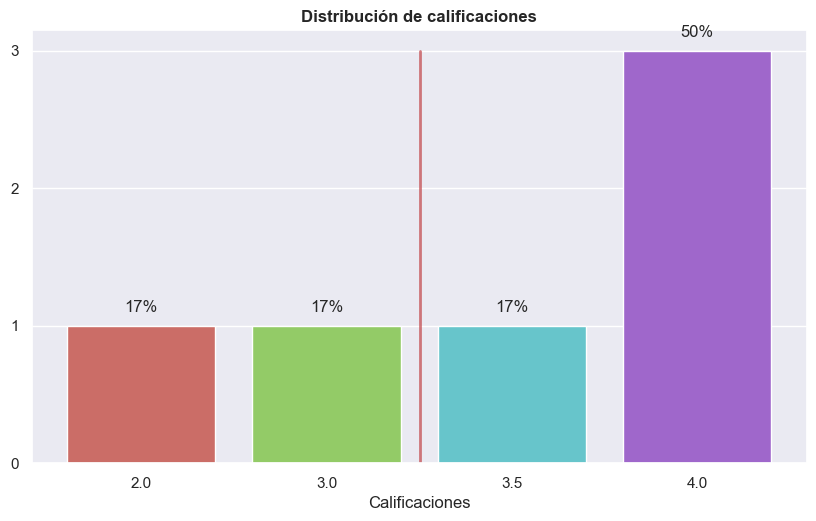

In [6]:
datos['Grupo de calificación'] = (2 * datos['Calificación']).astype(int) / 2
agrupadas_por_nota = datos['Grupo de calificación'].value_counts().sort_index()

plt.figure(figsize=(10, 5.625))
sns.countplot(x=datos['Grupo de calificación'], data=datos, hue='Grupo de calificación', legend=False,
              palette=sns.color_palette('hls', n_colors=len(agrupadas_por_nota)))
for nota, cantidad in enumerate(agrupadas_por_nota):
    plt.text(nota, cantidad+0.1, f'{round(100*cantidad/datos.shape[0])}%', ha='center')

plt.plot([datos['Calificación'].mean()-agrupadas_por_nota.keys().min(),
          datos['Calificación'].mean()-agrupadas_por_nota.keys().min()],
          [0, max(agrupadas_por_nota)], 'r', alpha=0.75, lw=2)

plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True)) 
plt.xlabel('Calificaciones')
plt.ylabel('')
plt.title('Distribución de calificaciones', fontweight='bold')

datos.drop(columns=['Grupo de calificación'], inplace=True)

print('Nota media: ' + str(round(datos['Calificación'].mean(), 2)) + ' estrellas sobre 5.')
print('Desviación estándar: ' + str(round(datos['Calificación'].std(), 2)))

#### Distribución de libros leídos por fecha de publicación

Hemos leído tantos libros de antes como después de 1993.

Lo más antiguo que hemos leído es: "Dune", de 1965.
Lo más moderno que hemos leído es: "La guerra de la amapola", del 2018.


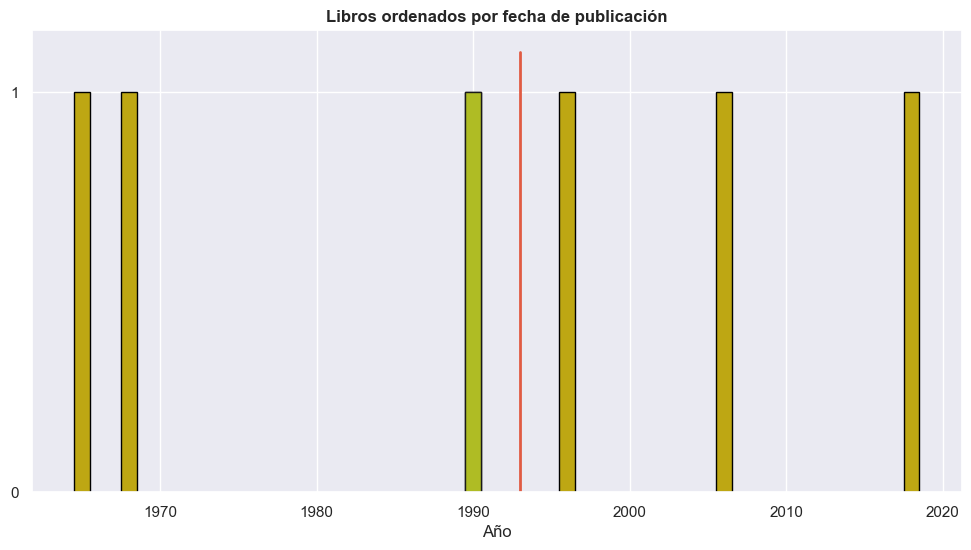

In [7]:
publicaciones = datos['Año de publicación'].groupby(datos['Año de publicación'].values).count() 

plt.figure(figsize=(12, 6))
x = np.array(publicaciones.index)
y = np.array(publicaciones)
plt.bar(x, y, color='#bea713', edgecolor='black', width=1)
if round(np.median(datos['Año de publicación'])) in publicaciones:
    plt.plot([round(np.median(datos['Año de publicación'])), round(np.median(datos['Año de publicación']))],
             [publicaciones[round(np.median(datos['Año de publicación']))], max(publicaciones)+0.1],
             '#e05b43', alpha=1, lw=2)
else:
    plt.plot([round(np.median(datos['Año de publicación'])), round(np.median(datos['Año de publicación']))],
             [0, max(publicaciones)+0.1], '#e05b43', alpha=1, lw=2)

decadas = publicaciones[publicaciones.index%10 == 0]
plt.bar(np.array(decadas.index), np.array(decadas), color='#afbc24', edgecolor='k', width=1)

# plt.ylim(0, publicaciones.values.max()+1)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
# plt.text(publicaciones.index.min(), publicaciones.loc[publicaciones.index.min()]+0.1,
#          str(publicaciones.index.min()), ha='left')
plt.xlabel('Año')
plt.title('Libros ordenados por fecha de publicación', fontweight='bold')

print('Hemos leído tantos libros de antes como después de ' + str(ceil(np.median(datos['Año de publicación']))) + '.\n')
print('Lo más antiguo que hemos leído es: "'
      + datos[datos['Año de publicación'] == datos['Año de publicación'].min()]['Título'].iloc[0] + '", de '
      + str(datos['Año de publicación'].min()) + '.')
print('Lo más moderno que hemos leído es: "'
      + datos[datos['Año de publicación'] == datos['Año de publicación'].max()]['Título'].iloc[0] + '", del '
      + str(datos['Año de publicación'].max()) + '.')

#### Libros leídos cada año

Hemos leído 2 libros en el periodo de un año.


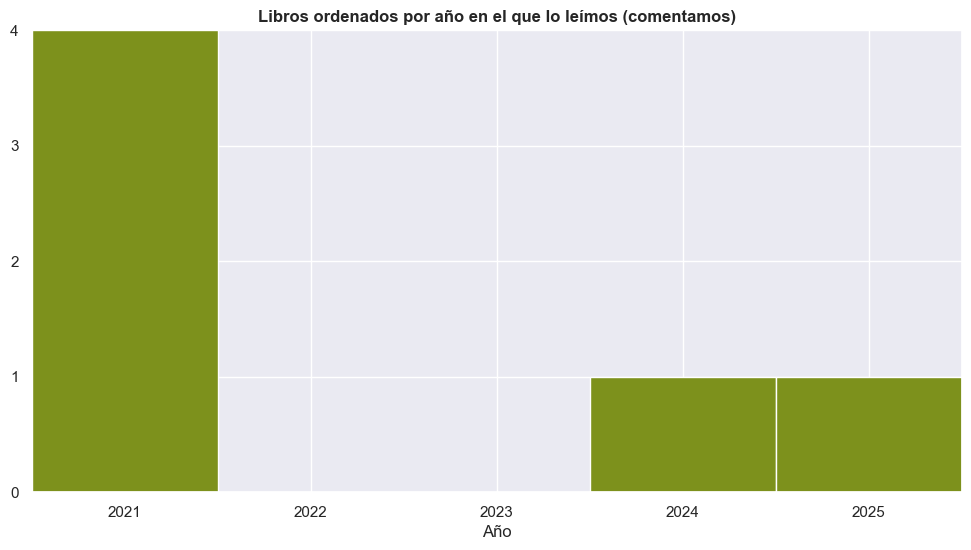

In [8]:
año_leído = datos['Día comentado'].apply(lambda x: x.year).value_counts().sort_index()

plt.figure(figsize=(12, 6))
x = np.array(list(año_leído.index))
y = np.array(año_leído)
plt.bar(x, y, color='#7d911c', width=1)

decada_leída = [[],[]]
for año in año_leído.index:
    if año%10 == 0:
        decada_leída[0].append(año)
        decada_leída[1].append(año_leído[año])

x_decada = np.array(decada_leída[0])
y_decada = np.array(decada_leída[1])
plt.bar(x_decada, y_decada, color='#afbc24', width=1)

plt.ylim(0, max(año_leído))
plt.xlim(min(año_leído.index)-0.5, max(año_leído.index)+0.5)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xlabel('Año')
plt.title('Libros ordenados por año en el que lo leímos (comentamos)', fontweight='bold')

print('Hemos leído ' + str(datos.loc[datetime.now() - datos['Día comentado'] < timedelta(days=365)].count()['Título'])
      + ' libros en el periodo de un año.')

#### Histórico de calificaciones medias anuales

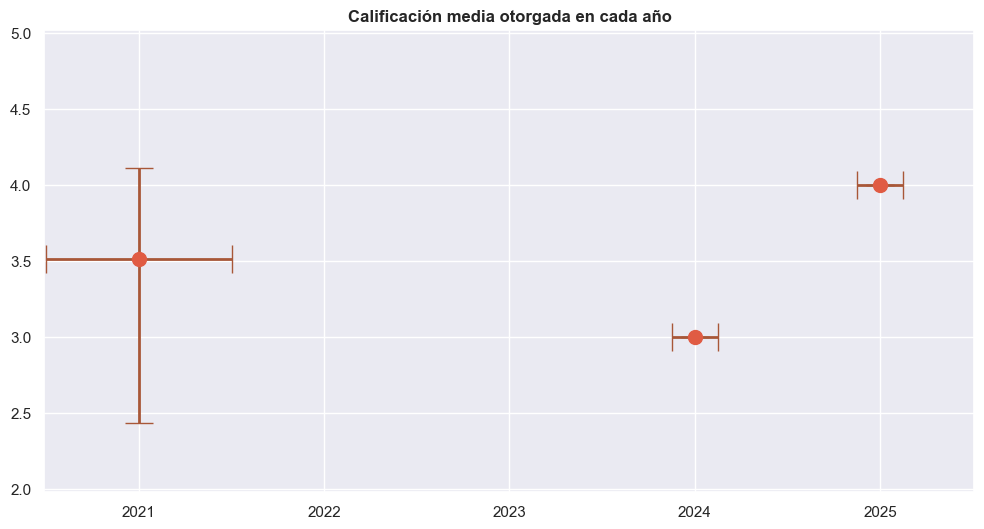

In [9]:
datos['Año'] = datos['Día comentado'].dt.year
datos_agg = datos.groupby('Año')['Calificación'].agg(['mean', 'max', 'min']).reset_index()
media_año = datos_agg['mean']
max_año = datos_agg['max']
min_año = datos_agg['min']

max_año = [max_año-media_año for max_año, media_año in zip(max_año, media_año)]
min_año = [media_año-min_año for media_año, min_año in zip(media_año, min_año)]
barras_año = [min_año, max_año]

plt.figure(figsize=(12, 6))
plt.errorbar(año_leído.index, media_año, xerr=año_leído.values/(2*max(año_leído.values)), yerr=barras_año,
             linestyle='', fmt='o', c='#e05b43', ecolor='#a85738', elinewidth=2, capsize=10, ms=10)
plt.title('Calificación media otorgada en cada año', fontweight='bold')
plt.xticks(np.arange(min(año_leído.index), max(año_leído.index)+1, 1))
plt.xlim(min(año_leído.index)-0.51, max(año_leído.index)+0.51)
plt.ylim(1.98, 5.02)
plt.show()

datos.drop(columns=['Año'], inplace=True)

##### Representación del intervalo temporal desde que se publicaron las obras hasta que las leímos

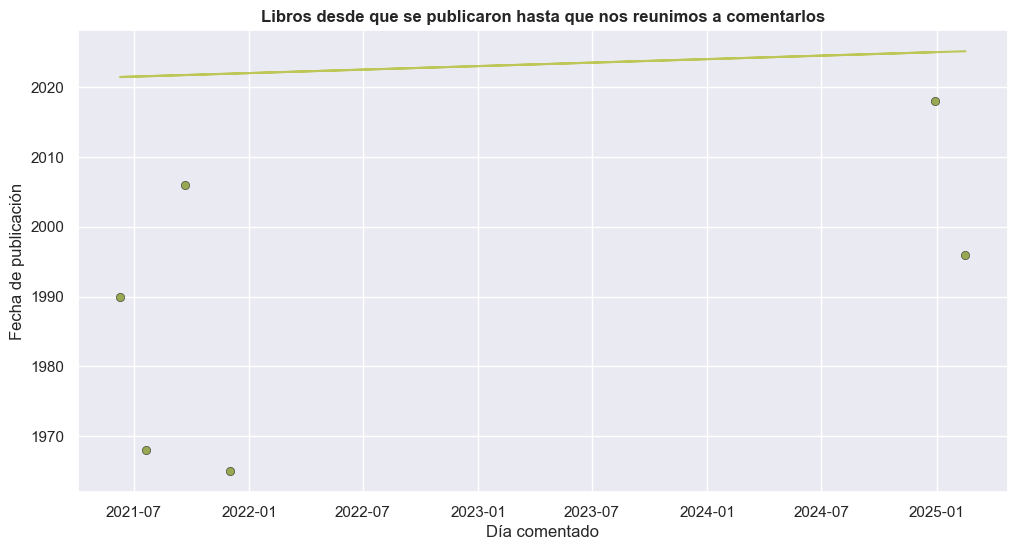

In [10]:
datos['Fecha de publicación'] = pd.to_datetime(datos['Año de publicación'], format='%Y')

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Día comentado', y='Fecha de publicación', data=datos, color='#7d911c', edgecolor='k', alpha=0.75)
plt.plot(datos['Día comentado'], datos['Día comentado'], '#afbc24', alpha=0.75)
plt.title('Libros desde que se publicaron hasta que nos reunimos a comentarlos', fontweight='bold')
plt.show()

datos.drop(columns=['Fecha de publicación'], inplace=True)

#### Histograma de extensión

Extensión media de los libro leídos: 536 páginas.


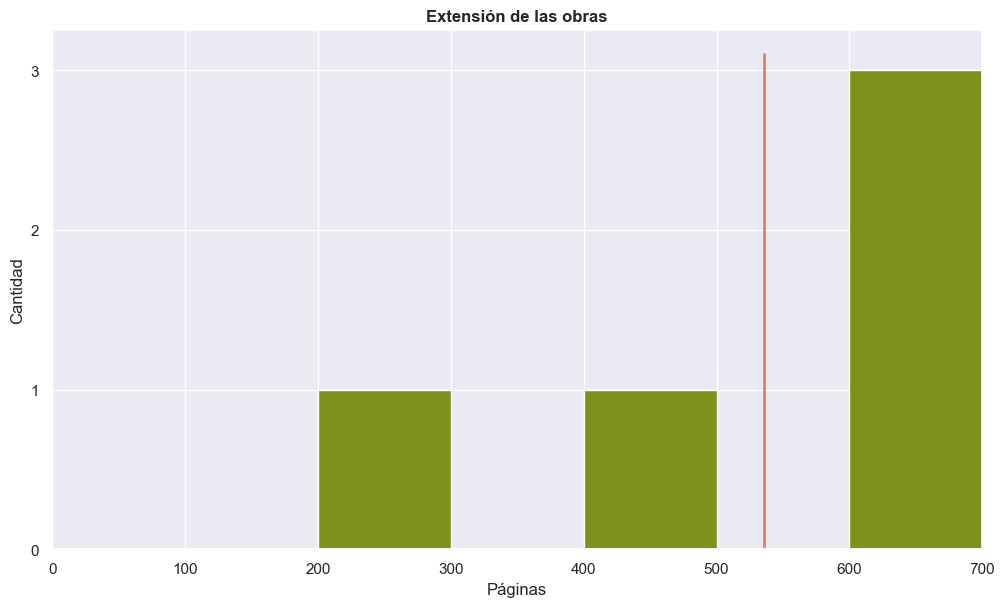

In [11]:
extensión = datos['Páginas']

plt.figure(figsize=(12,6.75))
n = plt.hist(extensión, range(0, int(extensión.max())+100, 100), color='#7d911c')
plt.plot([extensión.mean(), extensión.mean()], [0, max(n[0])+0.1], '#e05b43', alpha=0.75, lw=2)
plt.xlim(extensión.min(), extensión.max())
plt.xticks(range(0, int(extensión.max())+100, 100))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xlabel('Páginas')
plt.ylabel('Cantidad')
plt.title('Extensión de las obras', fontweight='bold')

print('Extensión media de los libro leídos: ' + str(round(extensión.mean())) + ' páginas.')

#### Distribución de notas por extensión

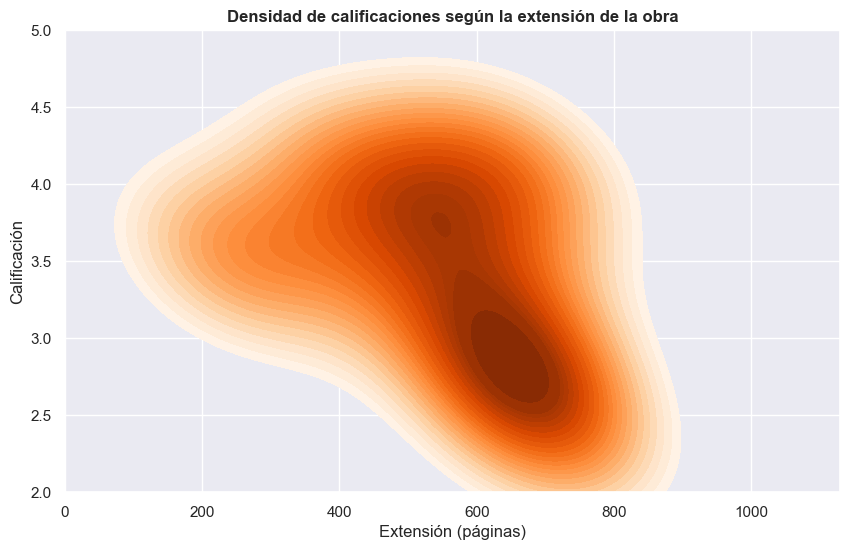

In [12]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=extensión, y=datos['Calificación'], cmap='Oranges', fill=True, alpha=1, thresh=0.2, levels=25)

plt.xlim(0)
plt.ylim(2, 5)
plt.xlabel('Extensión (páginas)')
plt.ylabel('Calificación')
plt.title('Densidad de calificaciones según la extensión de la obra', fontweight='bold')

plt.show()

#### Géneros más leídos

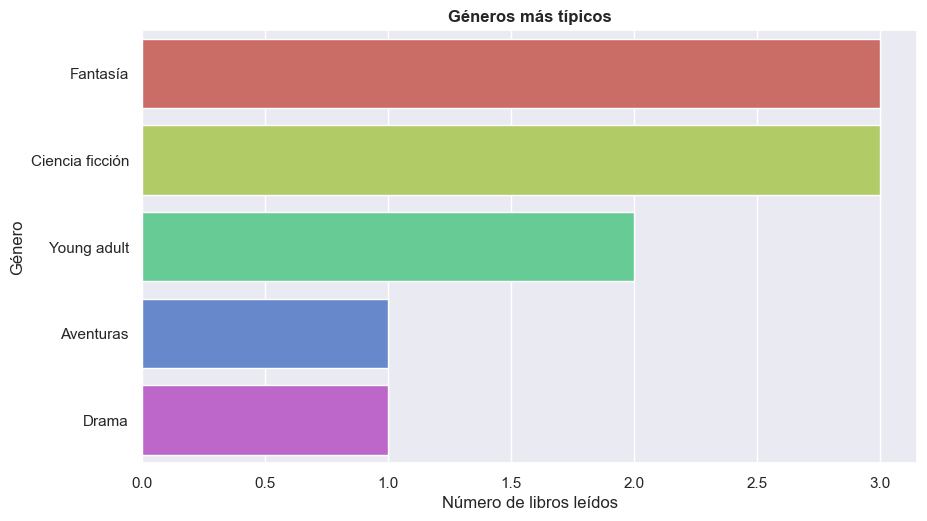

In [13]:
géneros = Counter(género.strip() for libro in datos['Géneros'] for género in libro)
géneros = {elemento: géneros[elemento] for elemento in sorted(géneros, key=géneros.get, reverse=True)}

plt.figure(figsize=(10, 5.625))
sns.barplot(x=list(géneros.values()), y=list(géneros.keys()), hue=list(géneros.keys()), orient='h', legend=False,
            palette=sns.color_palette('hls', n_colors=len(géneros)))
plt.xlabel('Número de libros leídos')
plt.ylabel('Género')
plt.title('Géneros más típicos', fontweight='bold')
plt.show()

#### Géneros favoritos

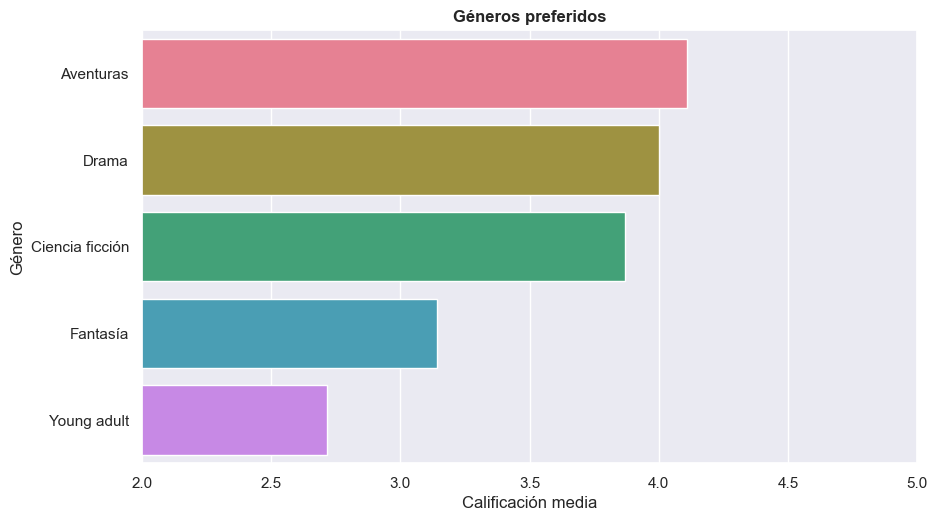

In [14]:
géneros_estrellas = {}
for libro in datos['Géneros'].index:
    for género in datos['Géneros'][libro]:
        género = género.strip()
        if género not in géneros_estrellas:
            géneros_estrellas[género] = datos['Calificación'][libro]

        else:
            géneros_estrellas[género] += datos['Calificación'][libro]

géneros_estrellas = pd.DataFrame([géneros_estrellas.keys(), géneros_estrellas.values()]).T
géneros_estrellas.columns = ['Géneros', 'Suma de calificaciones']
géneros_estrellas = géneros_estrellas.sort_values(['Géneros'])

géneros_cantidad = pd.DataFrame([géneros.keys(), géneros.values()]).T
géneros_cantidad.columns = ['Géneros', 'Cantidad']
géneros_cantidad = géneros_cantidad.sort_values(['Géneros'])

géneros_valoraciones = pd.merge(géneros_estrellas, géneros_cantidad)
géneros_valoraciones['Calificación media'] = géneros_valoraciones['Suma de calificaciones']/géneros_valoraciones['Cantidad']
géneros_valoraciones = géneros_valoraciones.sort_values('Calificación media', ascending=False)

plt.figure(figsize=(10, 5.625))
sns.barplot(x=list(géneros_valoraciones['Calificación media']), y=list(géneros_valoraciones['Géneros']),
            hue=list(géneros_valoraciones['Géneros']), orient='h', legend=False,
            palette=sns.color_palette('husl', n_colors=len(géneros)))
plt.xlim(2, 5)
plt.xlabel('Calificación media')
plt.ylabel('Género')
plt.title('Géneros preferidos', fontweight='bold')
plt.show()

#### Libros más leídos

In [15]:
datos = datos.sort_values(['Lectores', 'Páginas', 'Calificación'], ascending=[False, False, False])
datos.drop(columns=['Año de publicación', 'Géneros', 'Día comentado', 'Calificación']).head(5).reset_index(drop=True)

,Título,Autoría,Páginas,Lectores
0,La guerra de la amapola,R. F. Kuang,646,11
1,Dune,Frank Herbert,658,9
2,La milla verde,Stephen King,444,8
3,El imperio final,Brandon Sanderson,690,7
4,2001: Una odisea espacial,Arthur C. Clarke,240,4


#### Libros preferidos

In [16]:
datos = datos.sort_values(['Calificación', 'Lectores', 'Páginas'], ascending=[False, False, False])
datos.drop(columns=['Año de publicación', 'Géneros', 'Día comentado']).head(5).reset_index(drop=True)

,Título,Autoría,Páginas,Lectores,Calificación
0,Dune,Frank Herbert,658,9,4.11
1,La milla verde,Stephen King,444,8,4.00
2,Akira,Katsuhiro Otomo,<NA>,4,4.00
3,2001: Una odisea espacial,Arthur C. Clarke,240,4,3.50
4,La guerra de la amapola,R. F. Kuang,646,11,3.00


#### Libros menos preferidos

In [17]:
datos = datos.sort_values(['Calificación', 'Lectores', 'Páginas'], ascending=[True, False, False])
datos.drop(columns=['Año de publicación', 'Géneros', 'Día comentado']).head(5).reset_index(drop=True)

,Título,Autoría,Páginas,Lectores,Calificación
0,El imperio final,Brandon Sanderson,690,7,2.43
1,La guerra de la amapola,R. F. Kuang,646,11,3.00
2,2001: Una odisea espacial,Arthur C. Clarke,240,4,3.50
3,La milla verde,Stephen King,444,8,4.00
4,Akira,Katsuhiro Otomo,<NA>,4,4.00


#### Autores preferidos

In [31]:
datos_autor = datos.groupby(['Autoría']).sum(numeric_only=True)
datos_autor = datos_autor.rename(columns={'Páginas': 'Páginas leídas', 'Calificación': 'Estrellas'})
datos_autor['Obras leídas'] = datos.groupby(['Autoría']).count()['Título']
datos_autor['Calificación media'] = datos_autor['Estrellas']/datos_autor['Obras leídas']
datos_autor.drop(columns=['Año de publicación', 'Páginas leídas', 'Lectores', 'Estrellas'], inplace=True)
datos_autor = datos_autor.sort_values(['Calificación media', 'Obras leídas'], ascending=[False, False])
datos_autor.head(5)

,Obras leídas,Calificación media
Autoría,,
Frank Herbert,1,4.11
Katsuhiro Otomo,1,4.00
Stephen King,1,4.00
Arthur C. Clarke,1,3.50
R. F. Kuang,1,3.00


#### Autores menos preferidos

In [32]:
datos_autor.sort_values(['Calificación media', 'Obras leídas'], ascending=[True, False]).head(5)

,Obras leídas,Calificación media
Autoría,,
Brandon Sanderson,1,2.43
R. F. Kuang,1,3.00
Arthur C. Clarke,1,3.50
Katsuhiro Otomo,1,4.00
Stephen King,1,4.00
